In [1]:
import math
import random
import numpy as np
import scipy.stats as st
import scipy.integrate as intgr
import matplotlib.pyplot as plt

rounds = 100000

<b>Задание 2.</b> Написать программу, реализующую метод формирования двумерной ДСВ. Матрицу распределения ДСВ задаете самостоятельно. Выполнить статистическое исследование.

Матрица распределения ДСВ и векторы возможных значений компонент X и Y


In [2]:
P = [
    [0.2, 0.1, 0.035, 0.005],
    [0.025, 0.1,  0.015, 0.145],
    [0.025, 0.05, 0.2, 0.1]
]

# Устанавливаем проверку на свойство матрицы №1 
# если сумма != 1, то матрица неверная 
print(np.sum(P))
if round(np.sum(P), 3) != 1.000: 
    print("Матрица не подходит для работы")
else: print("Матрица подходит для работы")


1.0000000000000002
Матрица подходит для работы


In [3]:
#Задаём Х и Y
valuesX = [i for i in range(1, len(P) + 1)]
valuesY = [i + valuesX[-1] for i in range(1, len(P[0]) + 1)]
print(valuesX, valuesY)
n = len(valuesX)
m = len(valuesY)
valuesXY = []
valuesXY.append(valuesX)
valuesXY.append(valuesY)
print(valuesXY)
# Переход к ряду распределения вероятностей составляющей X 
#(второй пункт из свойств матрицы распределения вероятностей):
p_x = [np.sum(P[i]) for i in range(len(P))]
# Переход к ряду распределения вероятностей составляющей Y 
#(третий пункт из свойств матрицы распределения вероятностей):
p_y = [np.sum(P[:][0]) for i in range(1, len(P[0]))]
print("p_x", p_x, "\np_y", p_y)

[1, 2, 3] [4, 5, 6, 7]
[[1, 2, 3], [4, 5, 6, 7]]
p_x [0.3400000000000001, 0.28500000000000003, 0.375] 
p_y [0.3400000000000001, 0.3400000000000001, 0.3400000000000001]


Проверим составляющие двумерной ДСВ на независимость

In [4]:
def independence_test(P, n, m):  
    for i in range(n):
        for j in range(m):
            if P[i][j] != p_x[i]*p_y[j]:
                print('X,Y зависимы')
                print(f'P[{i}][{j}] != p_x[{i}]*p_y[{j}]')
                return
    print('X,Y независимы')
    
independence_test(P, n,m)

X,Y зависимы
P[0][0] != p_x[0]*p_y[0]


Находем условные плотности распределения

In [5]:
p_xy = np.copy(P)

for i in range(n):
    for j in range(m):
        p_xy[i][j] /= p_y[i]  
        
print("P(X|Y)\n",p_xy)

p_yx = np.copy(P)
for i in range(n):
    for j in range(m):
        p_yx[i][j] /= p_x[i]

print("P(Y|X)\n",p_yx)

P(X|Y)
 [[0.58823529 0.29411765 0.10294118 0.01470588]
 [0.07352941 0.29411765 0.04411765 0.42647059]
 [0.07352941 0.14705882 0.58823529 0.29411765]]
P(Y|X)
 [[0.58823529 0.29411765 0.10294118 0.01470588]
 [0.0877193  0.35087719 0.05263158 0.50877193]
 [0.06666667 0.13333333 0.53333333 0.26666667]]


Функция безусловного распределения X:

In [6]:
def F_x(n, m, DSV_matrix, p_x):
    F, summ = [], 0
    for i in range(n):
        summ += p_x[i]
        F.append(summ)
    return F

F_x = F_x(n, m, P, p_x)
print('F_x = ', F_x)

F_x =  [0.3400000000000001, 0.6250000000000001, 1.0]


Функции безусловного распределения Y:

In [7]:
def F_yx(n, m, DSV_matrix, p_x):
    F_yx = [[0] * m for i in range(n)]
    for i in range(n):
        summ = 0
        for j in range(m):
            summ += DSV_matrix[i][j]
            F_yx[i][j] = summ / p_x[i]
    return F_yx

F_yx = F_yx(n, m, P, p_x)
F_yx

[[0.588235294117647, 0.8823529411764706, 0.9852941176470588, 1.0],
 [0.08771929824561403, 0.43859649122807015, 0.49122807017543857, 1.0],
 [0.06666666666666667, 0.20000000000000004, 0.7333333333333334, 1.0]]

Получим данные для исследования X

In [8]:
def generate_X(n, F_x, N):
    f_x_bounds = [0] * (n+1)
    for i in range (n):
        f_x_bounds[i+1] = F_x[i]

    x_list = []
    for i in range(N):
        x_val = random.random()
        for k in range(n):
            if x_val > f_x_bounds[k] and x_val <= f_x_bounds[k+1]:
                x_list.append(k)
    return x_list

In [9]:
x_list = generate_X(n, F_x, rounds)

Получим данные для исследования Y:

In [10]:
def generate_Y(m, F_yx, x_list):
    y_list = []
    for x_i in x_list:
        f_yx_bounds = [0] * (m+1)
        for i in range(m):
            f_yx_bounds[i+1] = F_yx[x_i][i]
            
        y_val = random.random()
        for s in range(m):
            if y_val > f_yx_bounds[s] and y_val <= f_yx_bounds[s+1]:
                y_list.append(s)
    return y_list

In [11]:
y_list = generate_Y(m, F_yx, x_list)

Построеним гистограммы распределения 

Одномерный ряд P(x):  [0.3400000000000001, 0.28500000000000003, 0.375]
Одномерный ряд P(y):  [0.3400000000000001, 0.3400000000000001, 0.3400000000000001]


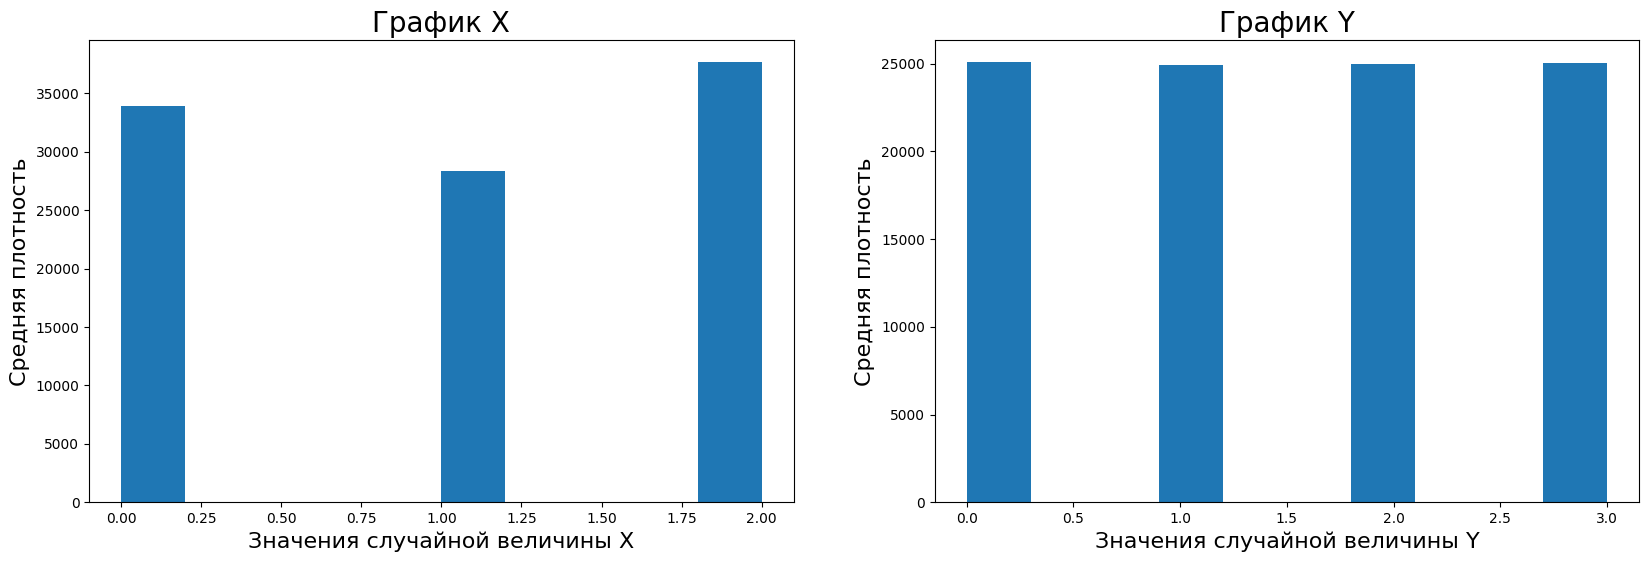

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)   
fig.set_figheight(6) 

ax[0].hist(x_list, bins=10)
ax[0].set_title('График X', {'fontsize': 20})
ax[0].set_ylabel('Средняя плотность', {'fontsize': 16})
ax[0].set_xlabel('Значения случайной величины X', {'fontsize': 16})

ax[1].hist(y_list, bins=10)
ax[1].set_title('График Y', {'fontsize': 20})
ax[1].set_ylabel('Средняя плотность', {'fontsize': 16})
ax[1].set_xlabel('Значения случайной величины Y', {'fontsize': 16})

print("Одномерный ряд P(x): ", p_x)
print("Одномерный ряд P(y): ", p_y)

Теоретические характеристики


In [13]:
def M(X, p_x):
    m_x = 0
    for i in range(len(p_x)):
        m_x += p_x[i] * X[i]
    return m_x

def D(X, p_x, m_x):
    d_sum = 0
    for i in range(len(p_x)):
        d_sum += p_x[i]*(X[i]**2)
    return d_sum - (m_x**2)

def R(X, Y, m_x, m_y, matrix, n, m):
    m_xy = 0
    for i in range(n):
        for j in range(m):
            m_xy += X[i]*Y[j]*matrix[i][j]
    return m_xy - (m_x * m_y)

In [14]:
M_x = M(x_list, p_x)
M_y = M(y_list, p_y)
D_x = D(x_list, p_x, M_x)
D_y = D(y_list, p_y, M_y)
R_xy = R(x_list, y_list, M_x, M_y, P, n, m) 
R_xy /=  (math.sqrt(D_x) * math.sqrt(D_y)) 
print("Математическое ожидание M[x]:", float(M_x))
print("Математическое ожидание M[y]:", float(M_y))
print("Дисперсия D[x]:", float(D_x))
print("Дисперсия D[y]:", float(D_y))
print("Коэффициент корреляции R[xy]:", float(R_xy))

Математическое ожидание M[x]: 1.0350000000000001
Математическое ожидание M[y]: 1.3600000000000003
Дисперсия D[x]: 0.7137749999999998
Дисперсия D[y]: 1.5503999999999996
Коэффициент корреляции R[xy]: 0.6914658729305795


Фактические характеристики состовляющих

In [15]:
def M_point(x_val, N):
    summ = 0
    for i in range(N):
        summ += x_val[i]
    return summ / N

def D_point(x_val, m_x, N): 
    summ = 0
    for i in range(N):
        summ += (x_val[i] - m_x)**2
    return summ / (N - 1)

def K_point(x_val, y_val, m_x, m_y, N):
    summ = 0
    for i in range(N):
        summ += (x_val[i] - m_x)*(y_val[i] - m_y)
    return summ / (N - 1)

m_x_point, m_y_point = M_point(x_list, rounds), M_point(y_list, rounds)
print("\nМатематическое ожидание M[x]:", m_x_point)
print("Математическое ожидание M[y]:", m_y_point)

d_x_point, d_y_point = D_point(x_list, m_x_point, rounds), D_point(y_list, m_y_point, rounds)
print("\nДисперсия D[x]:", d_x_point)
print("Дисперсия D[y]:", d_y_point)

r_xy_point = st.pearsonr(x_list, y_list)[0]
print("\nКоэффициент корреляции R[xy]:", r_xy_point)


Математическое ожидание M[x]: 1.03707
Математическое ожидание M[y]: 1.49942

Дисперсия D[x]: 0.7148429635295896
Дисперсия D[y]: 1.2518321819233122

Коэффициент корреляции R[xy]: 0.541825245350029


Обратим внимание на коэффициент корреляции

In [16]:
print("Коэффициент корреляции теоретический:", float(R_xy))
print("Коэффициент корреляции практический:", float(r_xy_point))

Коэффициент корреляции теоретический: 0.6914658729305795
Коэффициент корреляции практический: 0.541825245350029


Так как коэффициент корреляции не равен нулю => X и Y являются зависимыми.